# SYRIATEL CUSTOMER CHURN  PREDICTION : CUSTOMER LOSS PREDICTION

BY : Geoffrey Rotich

# Introduction

In this project, we will be lookin at SriaTel,a telecommunications company based in the United States. In this project, we will be focused on supervised learning algorithms and choose the best one which will predict whether a customer will churn or not.Based on our dataset, the project aims to find ways in which the telecommuniations company can predict whether the customer will churn and if not find ways to make the customers stay behind and not leave.
This goes a long way in building the company in terms of profits and popularity.

# PROJECT OVERVIEW

# Background

The telecommunication industry in the United States has evolved significantly
over the years,
playong a pivotal role in shaping the nation's communication landscape.
Ever since the firsttelegraph was created in the mid 19th century,
the industry has been witness
to a continousseries of technological advancements.

The advent of the telephone services in the late 1800s marked atransformative era.
The mid-20th century saw the rise of microwave and satelitetechnologies which facilitated
long-distance communication. The divestiture of AT&T in 1984 led to increased competition,
paving the way for creation of new telecommunication companies in the United States.

The late 20th century and early 21st century saw the
proliferation of mobile communications, with the emergence
of wireless networks and the widespread adoption of smartphones.
This period also saw the expansion of broadband internet services,
enabling high-speed data transformations.

Regulatory changes, like the Telecommunications
Act of 1996, aimed to foster competition and innovation
by breaking down monopolistic structures. As a result,
numerous players like SyriaTel entered the market, offering diverse services
ranging from traditional landline telephone to broadband internet, cable
television and mobile services.

Today, the U.S. Telecommunications industry continues to be dynamic, with
ongoing advancements in 5G technology, fiber-optic networks, and the
convergence of services. Major companies in the industry have played
central roles, contributing to the nation's connectivity and driving
innovation in communication technologies.



# Objectives

1)To investigate each feature and check for patterns. This will help in           identifying features to be used in creating the models. It will also help in   identifying distributions of numerical features and count the unique values     in each feature for categorical features.
2)To investigate the relationship between the feature variables and the target   variable. This will try to identify the patterns that may lead to customer     churn. This will also help in filtering some of the features to be used in     modelling.
3)To check the relationship between numerical features. This will determine the   models to be used for this project.
4)To create a precise model that will be used to predict customer churn           depending on a range of features.

# Import libraries

In [1]:
# Importing libraries.
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, roc_curve, auc, precision_score, recall_score, accuracy_score, f1_score
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Data understanding

In [5]:
# Function to load and examine the data

def load_and_examine_data(file_path):
    try:
        # Load the data from the specified file path
        data = pd.read_csv(file_path)

        # Display the shape, columns and the first few rows of the dataset
        print("----------------------------Details about the data----------------------------\n")
        print("----------------------------Shape of the dataset----------------------------\n")
        display(data.shape)
        print()
        print("----------------------------Columns of the dataset----------------------------\n")
        display(data.columns)
        print()
        print("----------------------------Head of the dataset----------------------------\n")
        display(data.head())
        print()
        # Display information about the dataset
        print("\n----------------------------Data information ----------------------------\n")
        display(data.info())
        print("\n----------------------------Descriptive Statistics of the dataset ----------------------------\n")
        display(data.describe())

        return data

    except FileNotFoundError:
        print(f"File '{file_path}' not found.")
    except Exception as e:
        print(f"An error occurred: {e}")

# Replace with your data file path
file_path = "customer_churn.csv" 
data = load_and_examine_data(file_path)

----------------------------Details about the data----------------------------

----------------------------Shape of the dataset----------------------------



(3333, 21)


----------------------------Columns of the dataset----------------------------



Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')


----------------------------Head of the dataset----------------------------



,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False




----------------------------Data information ----------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minu

None


----------------------------Descriptive Statistics of the dataset ----------------------------



,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


The dataset contains customers of SyriaTel and their information including whether they have churned or not. It contains 21 columns with 3333 entries.

# DATA PREPARATION

# Outliers

We will now check the outliers in the dataset. for this we will use  a function and boxplots.

In [7]:
# Creating a function that checks for outliers in the dataset.
def check_outliers(df, columns):
    for column in columns:
        # Calculate IQR (Interquartile Range)
        iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
        
        # Define lower and upper thresholds
        lower_threshold = df[column].quantile(0.25) - 1.5 * iqr
        upper_threshold = df[column].quantile(0.75) + 1.5 * iqr

        # Find outliers
        outliers = df[(df[column] < lower_threshold) | (df[column] > upper_threshold)]

        # Print the count of outliers
        print(f"{column}\nNumber of outliers: {len(outliers)}\n")

columns_to_check = data.select_dtypes(include = ['number'])
check_outliers(data, columns_to_check)

account length
Number of outliers: 18

area code
Number of outliers: 0

number vmail messages
Number of outliers: 1

total day minutes
Number of outliers: 25

total day calls
Number of outliers: 23

total day charge
Number of outliers: 25

total eve minutes
Number of outliers: 24

total eve calls
Number of outliers: 20

total eve charge
Number of outliers: 24

total night minutes
Number of outliers: 30

total night calls
Number of outliers: 22

total night charge
Number of outliers: 30

total intl minutes
Number of outliers: 46

total intl calls
Number of outliers: 78

total intl charge
Number of outliers: 49

customer service calls
Number of outliers: 267



# Boxplot

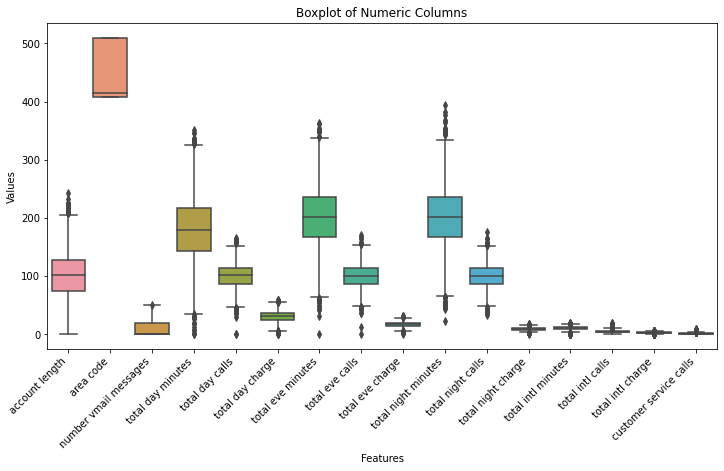

In [8]:
# Plotting a boxplot to check for outliers
features_to_plot = data.select_dtypes(include = ['number'])
plt.figure(figsize=(12,6))
sns.boxplot(data=features_to_plot, ax=plt.gca())
plt.xticks(rotation=45, ha='right')
plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Boxplot of Numeric Columns')
plt.show();

Even though we have outliers ,they may or may not affect customer churn hence we just keep them

#  EXPLORATORY DATA  ANALYSIS

# Univariate Analysis

We will useistograms to analyse the columns individually

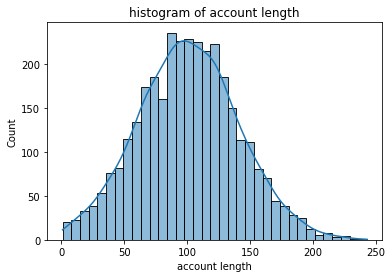

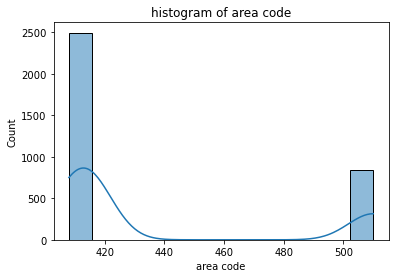

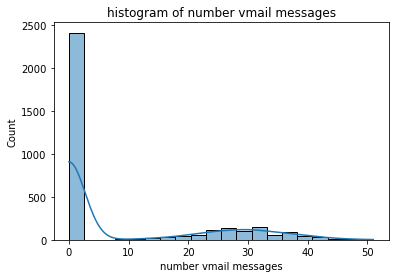

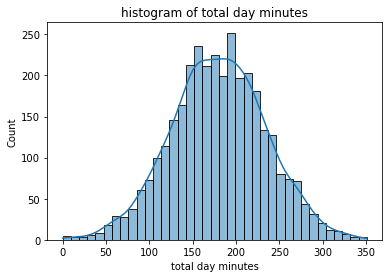

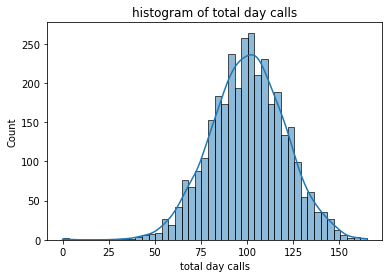

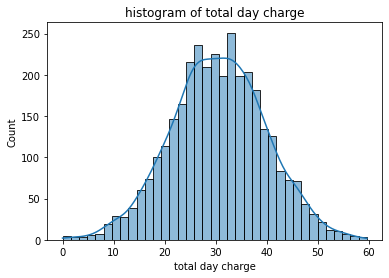

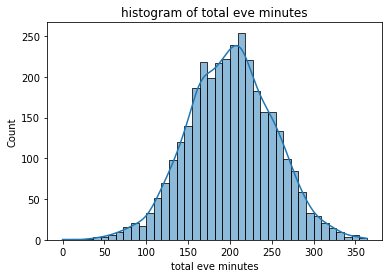

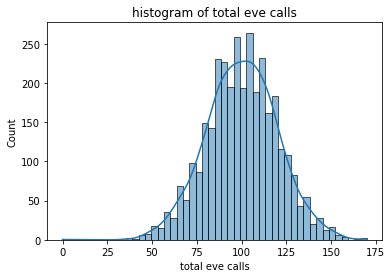

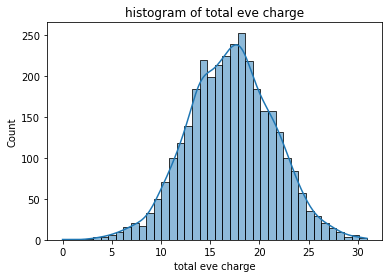

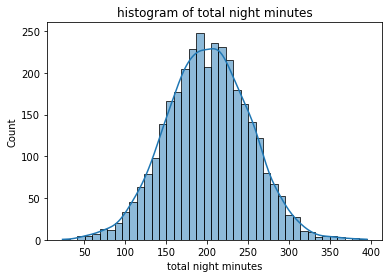

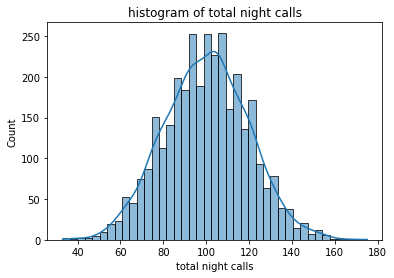

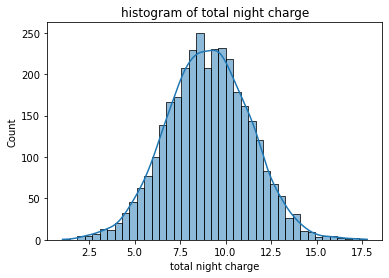

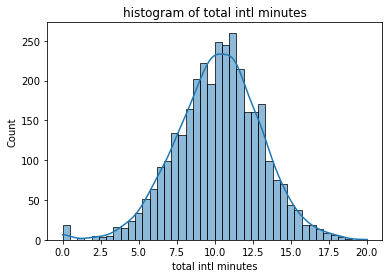

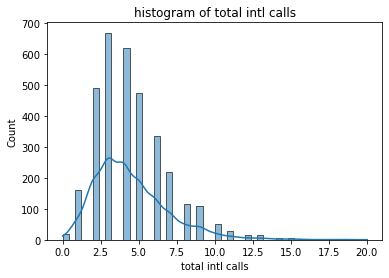

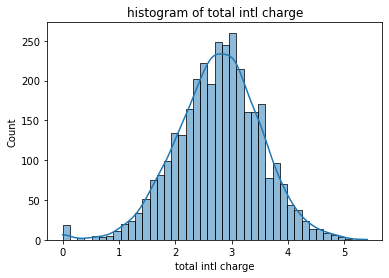

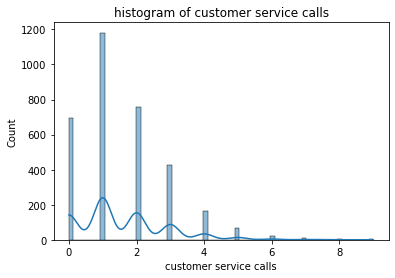

In [10]:
# Creating histograms for selected columns

# Identify numerical columns
numeric_columns = data.select_dtypes(include=['number'])

# Iterate over numerical columns and create histograms
for column in numeric_columns.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=numeric_columns, x=column, bins = 'auto', common_norm = False, kde = True)
    plt.title(f"histogram of {column}")
    plt.show()

We can see that most of the columns contain have a normal distribution. Those that do not have a normal distribution have discrete distributions. We will have to normalize our data in the data preprocessing part for those features without a normal distribution.

We can now check the categorical data. We will check the number of unique values in each column to see the columns we won't use in our models.

In [11]:
# Checking number of unique values in each categorical column.
categorical_columns = data.select_dtypes(include=['object', 'bool'])
for column in categorical_columns.columns:
    print(f'\n{column}\n{data[column].nunique()}')
    if data[column].nunique() == data.shape[0]:
        print(f'{column} is a feature to be dropped.')


state
51

phone number
3333
phone number is a feature to be dropped.

international plan
2

voice mail plan
2

churn
2


# Bivariate Analysis

We will be comparing our features to the target which is the churn column. We will begin by comparing the numerical features with the target variable.

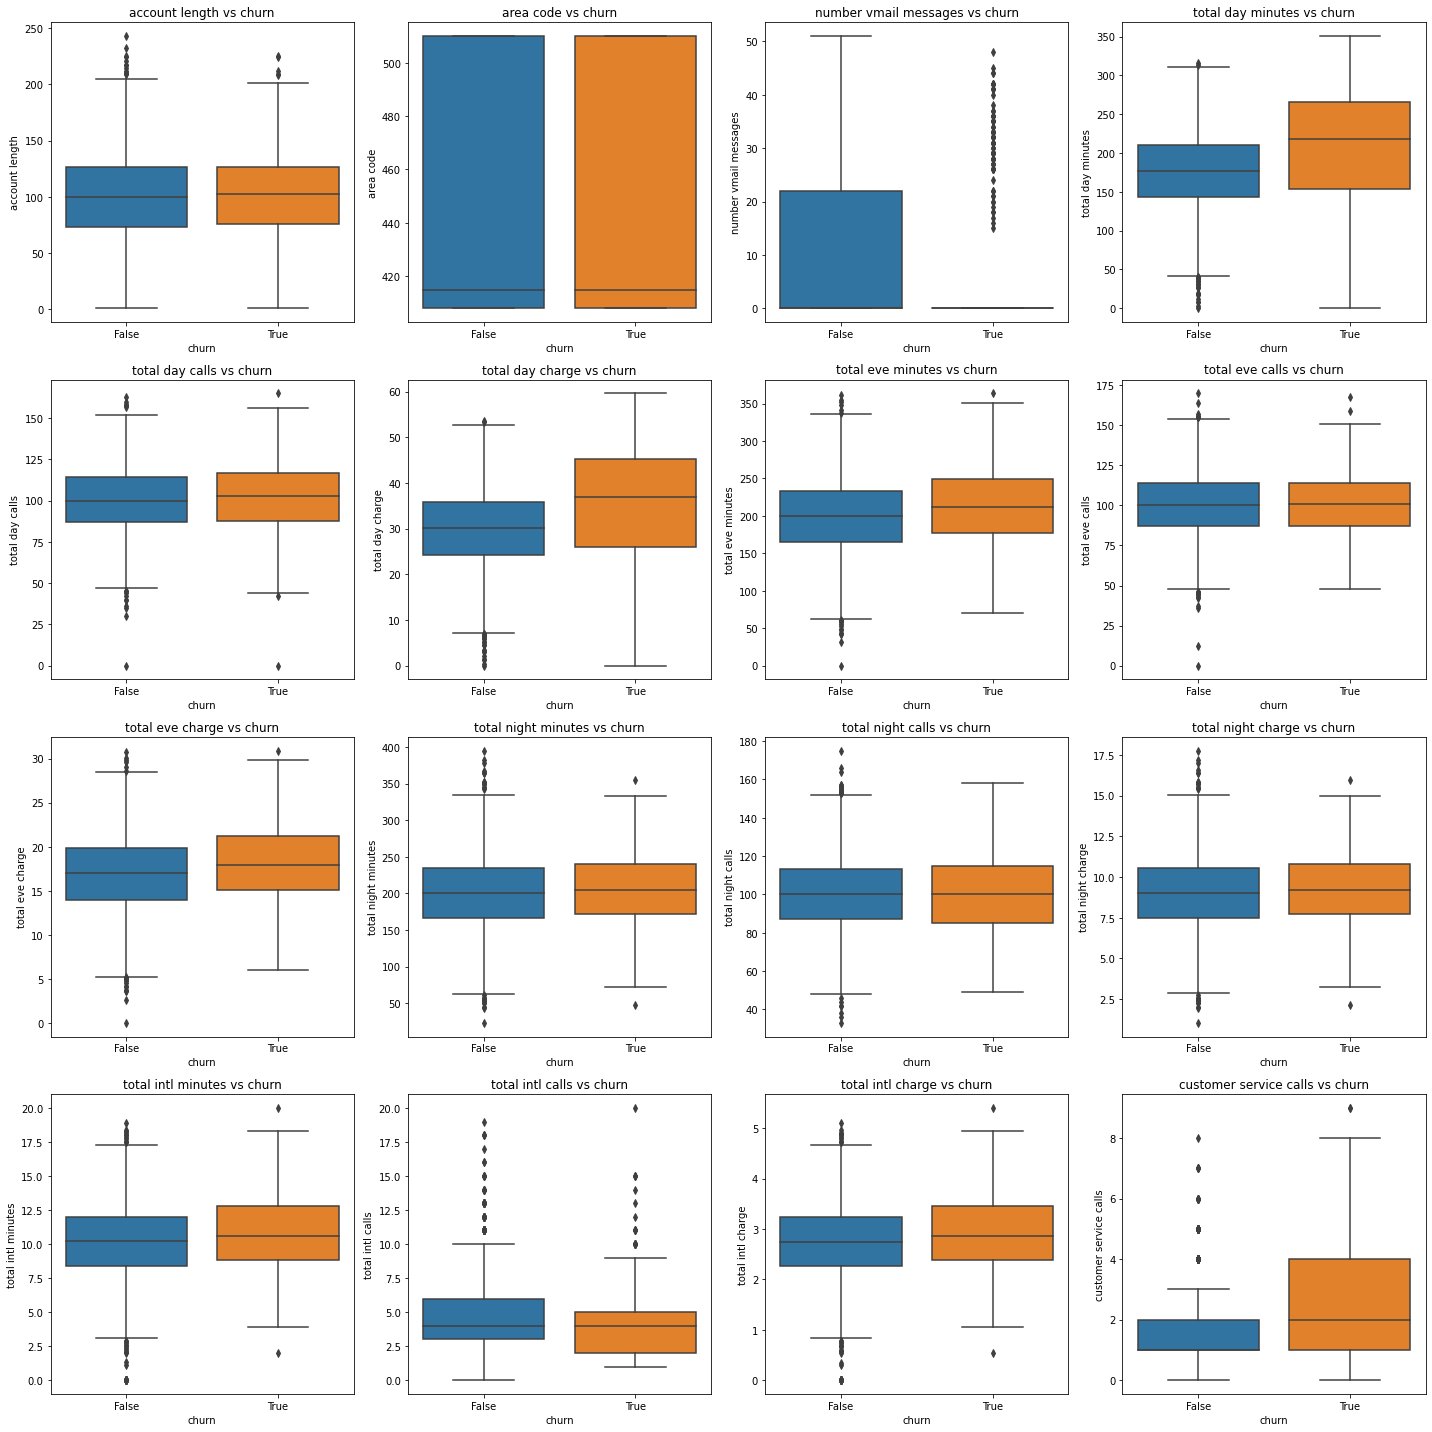

In [12]:
# Selecting the columns to be used in the plot
numeric_columns = data.select_dtypes(include=['number'])

plt.figure(figsize=(20,20))

for i, column in enumerate(numeric_columns):
    plt.subplot(4, 4, i+1)
    sns.boxplot(x='churn', y=column, data=data)
    plt.title(f'{column} vs churn')

plt.tight_layout()
plt.show();

Based on the plots we have created, we can see that area code has no pattern on customer churn. That means we will drop it during the preprocessing stage. We can also see that the customers who have churned have made the most customer service calls compared to those who haven't. They also incur a lot of charges during the day due to spending a lot of minutes in their calls. For the other features it seems those who have churned and those who haven't have somewhat similar patterns. We can now create a plot that compares the categorical features with the target.

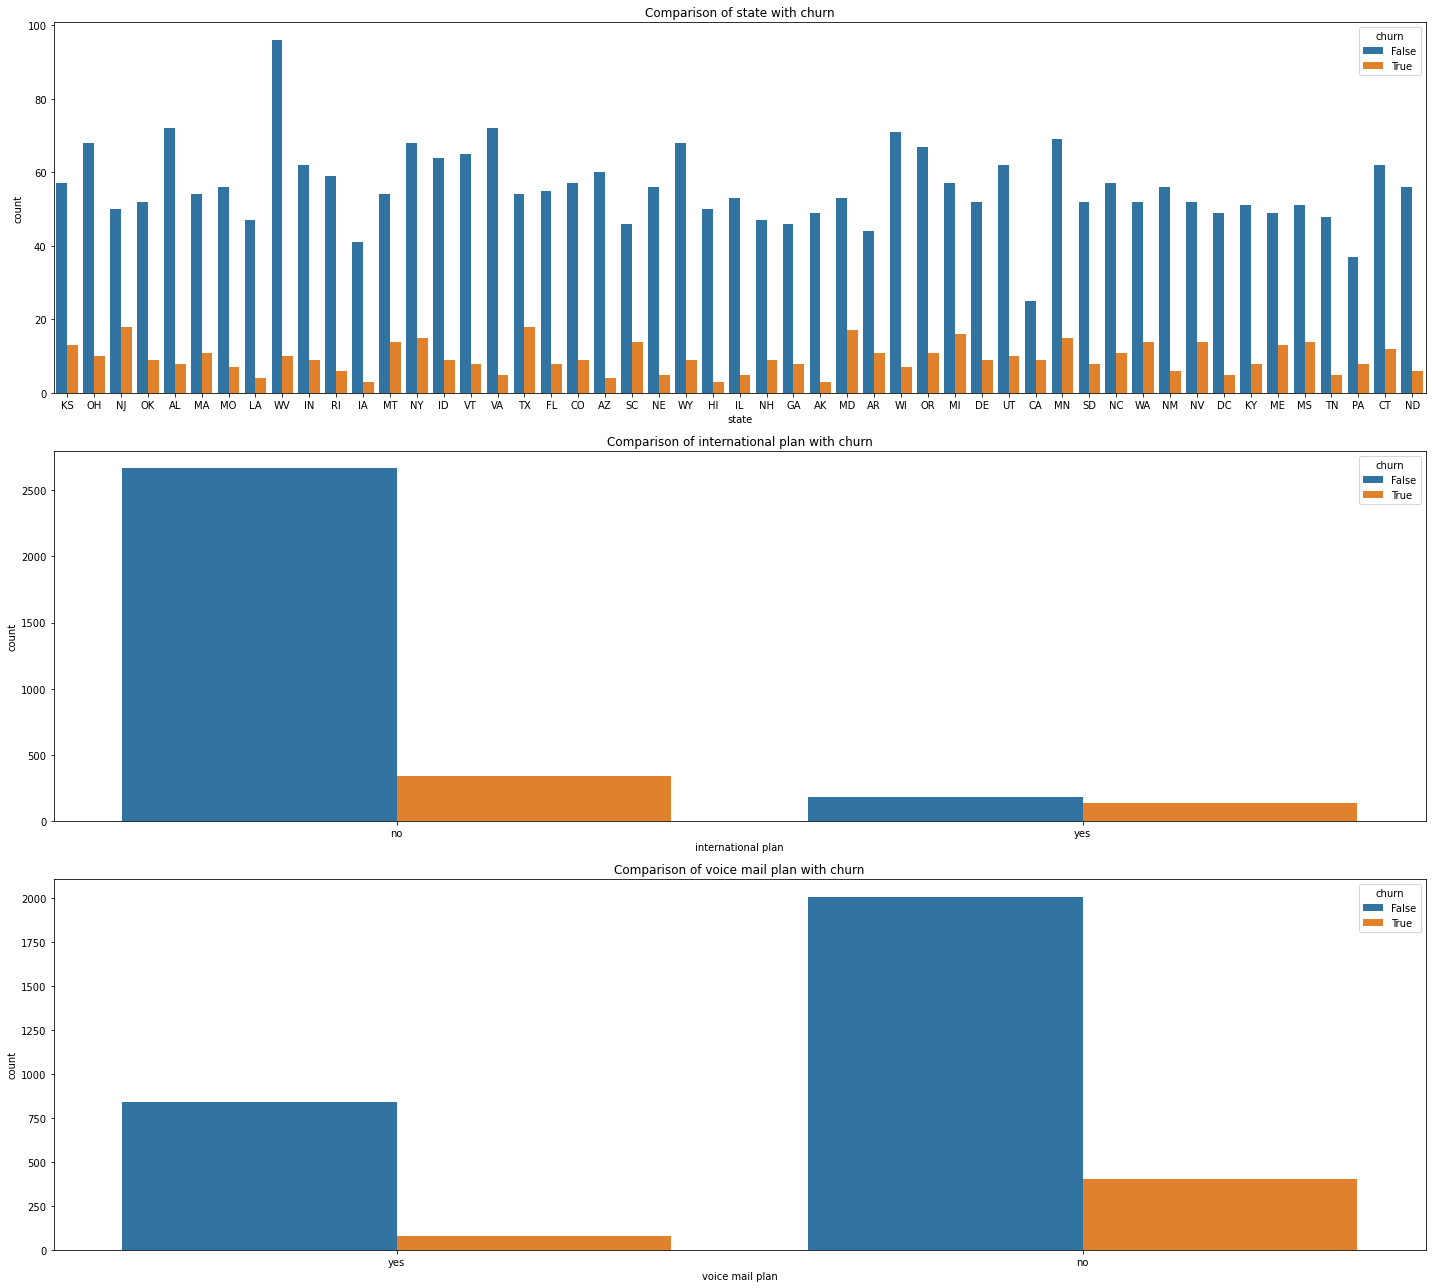

In [13]:
# Dropping the phone number column from the categorical_columns dataframe
categorical_columns = data.select_dtypes(include='object').drop(['phone number'], axis=1).columns

# Plotting the bar graphs

fig, axes = plt.subplots(nrows=len(categorical_columns), ncols=1, figsize=(20, 6 * len(categorical_columns)))

for i, column in enumerate(categorical_columns):
    sns.countplot(x=column, hue='churn', data=data, ax=axes[i])
    axes[i].set_title(f'Comparison of {column} with churn')

plt.tight_layout()
plt.show();

there is no pattern in the `state` column since the comparison looks similar in each state  , that means we wil dropit in the pre processing stage.

# Multivariate Analysis

Here, we will compare the relationship between the numeric columns and see how they correlate with each other using heatmaps

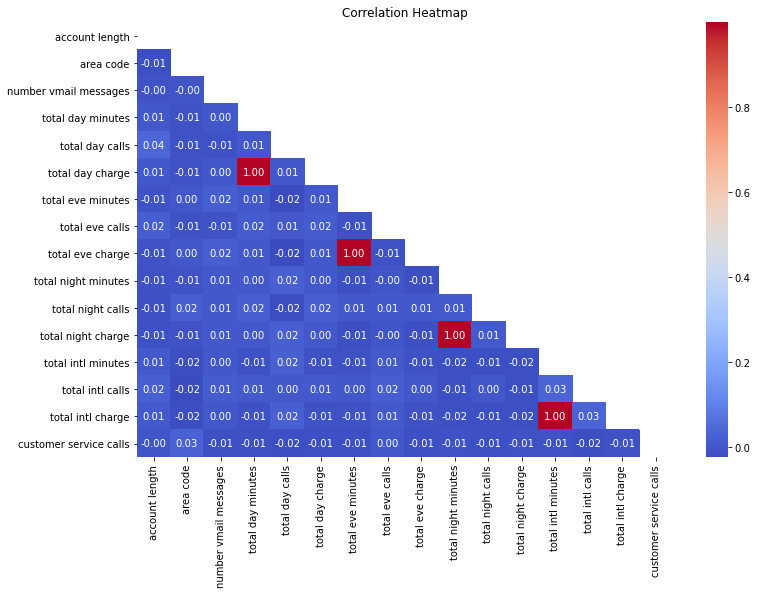

In [14]:
numeric_columns = data.select_dtypes(include=['number'])
# Creating a correlation matrix
correlation_matrix = numeric_columns.corr()
# Create a mask to hide the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
# Creating the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", mask=mask,)
plt.title('Correlation Heatmap')
plt.show();

We see a perfect positive correlation between minutes spent on calls and charges incurred. This means that there is no independence between these features and in turn it means we wiil not use Logistic Regression or any Naive Bayes model which assume independence of features.

# Modelling

We will create different models to choose from but first we do data preprocessing

Since the models only use features which are numerical in nature, we will encode the values in the `international plan` and `voice mail plan` columns. This will be done by creating a function that maps the values.

In [15]:
# Checking the value counts of the two columns
for column in data[['international plan', 'voice mail plan']]:
    print(f'\n{data[column].value_counts()}')


no     3010
yes     323
Name: international plan, dtype: int64

no     2411
yes     922
Name: voice mail plan, dtype: int64


In [16]:
# Create a mapping function and apply it to the selected columns
def binary_feature(target_value):
    if target_value == 'yes':
        return 1
    else:
        return 0

# Applying the function to the selected columns.
for column in data[['international plan', 'voice mail plan']]:
    data[column] = data[column].apply(binary_feature)
    print(f'\n{data[column].value_counts()}')


0    3010
1     323
Name: international plan, dtype: int64

0    2411
1     922
Name: voice mail plan, dtype: int64


 We will conduct a 80/20 split with a random state of 42 for reproducibility. We will also be dropping the features we had mentioned above in this part. Since there is class imbalance in the target variable, we will conduct the SMOTE technique to find its effects.

In [17]:
# Choosing X and y
y = data['churn']
X = data.drop(['churn', 'state', 'area code', 'phone number'], axis=1)

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mitigating the class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Conduct another split
X_train_resampled, X_val, y_train_resampled, y_val = train_test_split(X_resampled, y_resampled, 
                                                                      test_size=0.2, random_state=42)

Create functions that brings all the the classification metrics.

In [19]:
# Creating the function
# Confusion matrix
def confusion_matrix_metrics(y_true, y_pred, model):
    cf = confusion_matrix(y_true, y_pred)
    labels = model.classes_
    plt.figure(figsize=(8,6))
    sns.heatmap(cf, annot=True, 
                fmt='d', 
                cmap='Blues', 
                cbar=False, 
                xticklabels=labels, 
                yticklabels=labels)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show();

In [20]:
# Evaluation metrics
def evaluation_metrics(y_true, y_pred):
    print(classification_report(y_true, y_pred))
    print('---------------------------------------------------')
    print(f'Precision score for this model is: {precision_score(y_true, y_pred)}')
    print(f'Recall score for this model is: {recall_score(y_true, y_pred)}')
    print(f'Accuracy score for this model is: {accuracy_score(y_true, y_pred)}')
    print(f'F1 score for this model is: {f1_score(y_true, y_pred)}')
    print('---------------------------------------------------')
    precision, recall, thresholds = precision_recall_curve(y_true, y_pred)
    auc_pr = auc(recall, precision)
    print(f'AUC for the precision-recall curve is: {auc_pr}')
    plt.style.use('seaborn-darkgrid')
    plt.plot(recall, precision, color= 'darkorange', lw=2, label='Precision_Recall_Curve')
    plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.yticks([i/10.0 for i in range(11)])
    plt.xticks([i/10.0 for i in range(11)])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision_Recall_Curve')
    plt.legend(loc='lower right')
    plt.show();

In [21]:
# ROC metrics
def roc_metrics(y_true, y_pred):
    fpr, tpr, thresholds = roc_curve(y_true, y_pred)
    roc_auc = auc(fpr, tpr)
    print(f'AUC for the ROC curve is: {roc_auc}')
    plt.style.use('seaborn-darkgrid')
    plt.plot(fpr, tpr, color= 'darkorange', lw=2, label='ROC Curve')
    plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.yticks([i/10.0 for i in range(11)])
    plt.xticks([i/10.0 for i in range(11)])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show();  

# 1)Decision trees

 We have used decision trees because not only can be used for binary classification but also it does not assume independence of features. We can now create a baseline decision tree model.


In [22]:
# Creating a pipeline for the model
dt1 = Pipeline([
    ('scaler', MinMaxScaler()),
    ('clf', DecisionTreeClassifier(random_state=42))
])
# Fitting the model
dt1.fit(X_train_resampled, y_train_resampled)
# Predicting the model
y_pred1 = dt1.predict(X_val)

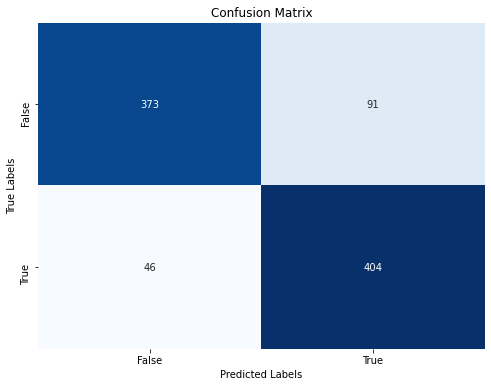

In [23]:
# Evaluating the confusion matrix
confusion_matrix_metrics(y_val, y_pred1, dt1)

              precision    recall  f1-score   support

       False       0.89      0.80      0.84       464
        True       0.82      0.90      0.86       450

    accuracy                           0.85       914
   macro avg       0.85      0.85      0.85       914
weighted avg       0.85      0.85      0.85       914

---------------------------------------------------
Precision score for this model is: 0.8161616161616162
Recall score for this model is: 0.8977777777777778
Accuracy score for this model is: 0.850109409190372
F1 score for this model is: 0.8550264550264551
---------------------------------------------------
AUC for the precision-recall curve is: 0.8821338107552549


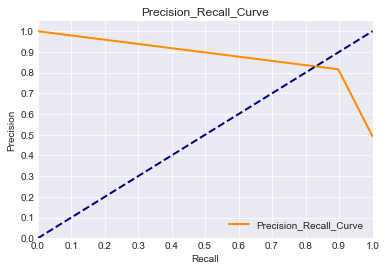

In [28]:
# Evaluating the classification metrics
evaluation_metrics(y_val, y_pred1)

AUC for the ROC curve is: 0.8508285440613027


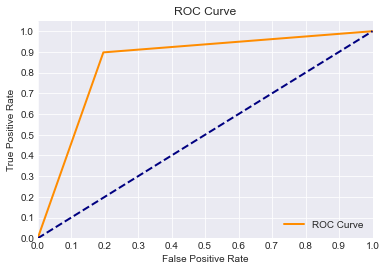

In [26]:
# Evaluating the ROC metrics
roc_metrics(y_val, y_pred1)

We can also try hyperparameter tuning using GridSearchCV and see whether we will get the best decision tree.

In [27]:
# Creating the grid parameter
grid1 = {
    'clf__criterion': ['entropy', 'gini'],
    'clf__splitter': ['best', 'random'],
    'clf__max_depth': [None, 2, 5, 10, 20, 50],
    'clf__min_samples_split': [2, 5, 7, 10, 15, 20],
    'clf__min_samples_leaf': [1, 2, 4, 5, 7]
}
# Creating the grid

gridsearch1 = GridSearchCV(estimator=dt1,
                           param_grid=grid1,
                           scoring='accuracy',
                           cv=5)
# Fitting the data to the grid search
gridsearch1.fit(X_train_resampled, y_train_resampled)

# Getting the best parameters from the grid search
gridsearch1.best_params_

{'clf__criterion': 'entropy',
 'clf__max_depth': None,
 'clf__min_samples_leaf': 1,
 'clf__min_samples_split': 2,
 'clf__splitter': 'random'}

In [29]:
# Using the hyperparameters gotten from the gridsearch
dt3 = Pipeline([
    ('scaler', MinMaxScaler()),
    ('clf', DecisionTreeClassifier(random_state=42, 
                                   criterion='entropy', 
                                   max_depth=None, 
                                   min_samples_leaf=1, 
                                   min_samples_split=2, 
                                   splitter='random'))
])
# Fitting the model
dt3.fit(X_train_resampled, y_train_resampled)
# Predicting the model
y_pred3 = dt3.predict(X_val)

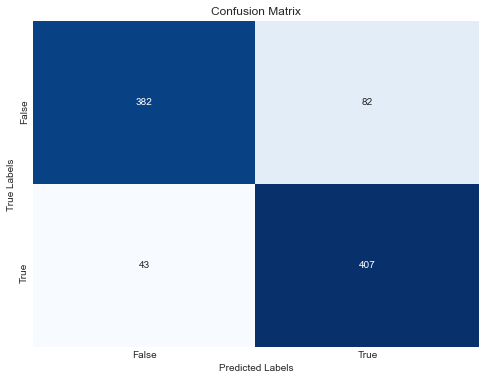

In [30]:
# Confusion metrics 
confusion_matrix_metrics(y_val, y_pred3, dt3)

              precision    recall  f1-score   support

       False       0.90      0.82      0.86       464
        True       0.83      0.90      0.87       450

    accuracy                           0.86       914
   macro avg       0.87      0.86      0.86       914
weighted avg       0.87      0.86      0.86       914

---------------------------------------------------
Precision score for this model is: 0.8323108384458078
Recall score for this model is: 0.9044444444444445
Accuracy score for this model is: 0.8632385120350109
F1 score for this model is: 0.8668796592119277
---------------------------------------------------
AUC for the precision-recall curve is: 0.8919006173751043


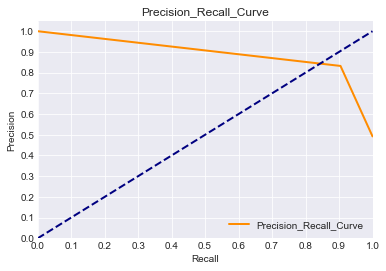

In [31]:
# Evaluation metrics
evaluation_metrics(y_val, y_pred3)

AUC for the ROC curve is: 0.8638601532567051


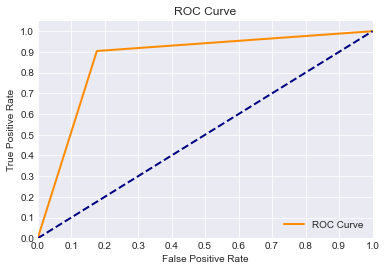

In [32]:
# ROC metrics
roc_metrics(y_val, y_pred3)

As we can see, the model where we have tuned the hyperparameters has improved metrics compared to the previous one. The number of false positives has increased but the false negatives has reduced. Precision is the only metric with a decrease but other metrics, including ROC-AUC has improved. We will opt with this model on the basis that it has better metrics compared to the other model.

# K-Nearest Neighbors

Since the model does not assume independence of variables we can use this algorithm.

We first create a pipeline for the model

In [33]:
# Creating a pipeline for the model
knn1 = Pipeline([
    ('scaler', MinMaxScaler()),
    ('clf', KNeighborsClassifier())
])
# Fitting the model
knn1.fit(X_train_resampled, y_train_resampled)
# Predicting the model
y_pred4 = knn1.predict(X_val)

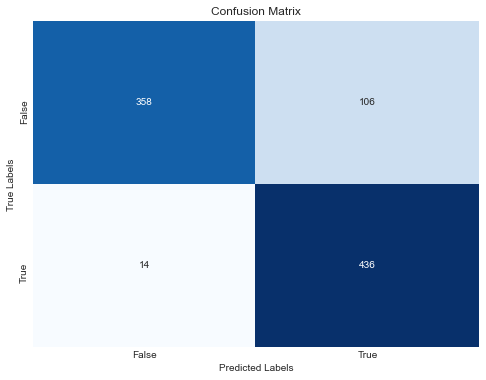

In [34]:
# Confusion metrics 
confusion_matrix_metrics(y_val, y_pred4, knn1)

              precision    recall  f1-score   support

       False       0.96      0.77      0.86       464
        True       0.80      0.97      0.88       450

    accuracy                           0.87       914
   macro avg       0.88      0.87      0.87       914
weighted avg       0.88      0.87      0.87       914

---------------------------------------------------
Precision score for this model is: 0.8044280442804428
Recall score for this model is: 0.9688888888888889
Accuracy score for this model is: 0.8687089715536105
F1 score for this model is: 0.8790322580645161
---------------------------------------------------
AUC for the precision-recall curve is: 0.8943171099107052


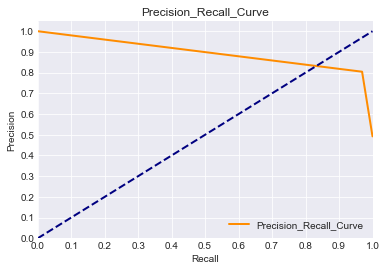

In [35]:
# Evaluation metrics
evaluation_metrics(y_val, y_pred4)

AUC for the ROC curve is: 0.87022030651341


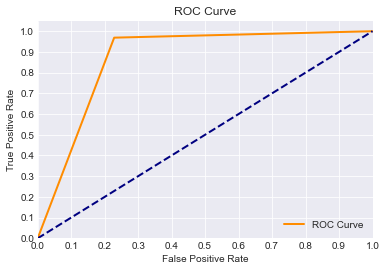

In [36]:
# ROC metrics
roc_metrics(y_val, y_pred4)

We can add a few hyperparameters for our second model

In [44]:
knn2 = Pipeline([
    ('scaler', MinMaxScaler()),
    ('clf', KNeighborsClassifier(n_neighbors=7, algorithm='ball_tree', weights='distance'))
])
# Fitting the model
knn2.fit(X_train_resampled, y_train_resampled)
# Predicting the model
y_pred5 = knn2.predict(X_val)

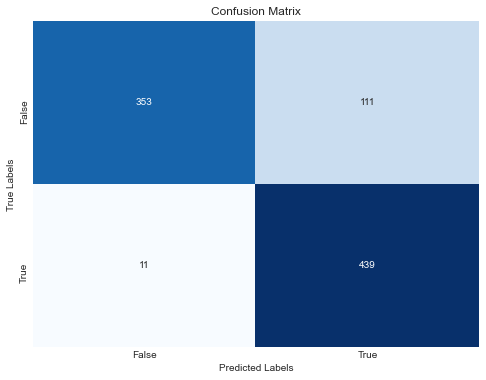

In [45]:
# Confusion metrics 
confusion_matrix_metrics(y_val, y_pred5, knn2)

              precision    recall  f1-score   support

       False       0.97      0.76      0.85       464
        True       0.80      0.98      0.88       450

    accuracy                           0.87       914
   macro avg       0.88      0.87      0.87       914
weighted avg       0.89      0.87      0.87       914

---------------------------------------------------
Precision score for this model is: 0.7981818181818182
Recall score for this model is: 0.9755555555555555
Accuracy score for this model is: 0.8665207877461707
F1 score for this model is: 0.8780000000000001
---------------------------------------------------
AUC for the precision-recall curve is: 0.8928861923391463


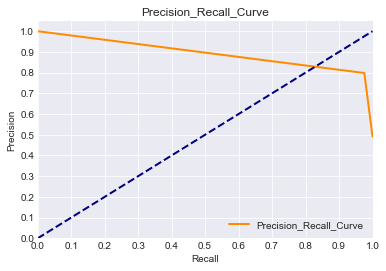

In [46]:
# Evaluation metrics
evaluation_metrics(y_val, y_pred5)

AUC for the ROC curve is: 0.8681657088122605


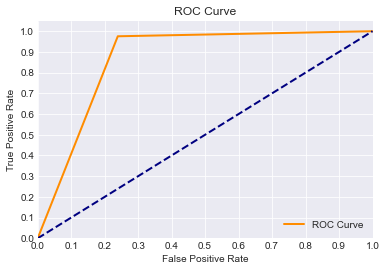

In [47]:
# ROC metrics
roc_metrics(y_val, y_pred5)

We can now use grid researchCV to find the best model for use

In [48]:
# Creating the grid parameter
grid2 = {
    'clf__n_neighbors': [1, 2, 3, 5],
    'clf__weights': ['uniform', 'distance'],
    'clf__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'clf__p': [1, 2, 5]
}
# Creating the grid

gridsearch2 = GridSearchCV(estimator=knn1,
                           param_grid=grid2,
                           scoring='accuracy',
                           cv=5)
# Fitting the data to the grid search
gridsearch2.fit(X_train_resampled, y_train_resampled)

# Getting the best parameters from the grid search
gridsearch2.best_params_

{'clf__algorithm': 'auto',
 'clf__n_neighbors': 2,
 'clf__p': 1,
 'clf__weights': 'uniform'}

In [49]:
# Using the hyperparameters gotten from the gridsearch
knn3 = Pipeline([
    ('scaler', MinMaxScaler()),
    ('clf', KNeighborsClassifier(n_neighbors=2, algorithm='auto', weights='uniform', p=1))
])
# Fitting the model
knn3.fit(X_train_resampled, y_train_resampled)
# Predicting the model
y_pred6 = knn3.predict(X_val)

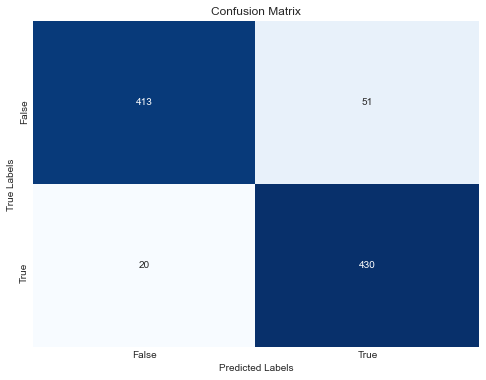

In [50]:
# Confusion metrics 
confusion_matrix_metrics(y_val, y_pred6, knn3)

              precision    recall  f1-score   support

       False       0.95      0.89      0.92       464
        True       0.89      0.96      0.92       450

    accuracy                           0.92       914
   macro avg       0.92      0.92      0.92       914
weighted avg       0.92      0.92      0.92       914

---------------------------------------------------
Precision score for this model is: 0.893970893970894
Recall score for this model is: 0.9555555555555556
Accuracy score for this model is: 0.9223194748358862
F1 score for this model is: 0.9237379162191193
---------------------------------------------------
AUC for the precision-recall curve is: 0.935704143800424


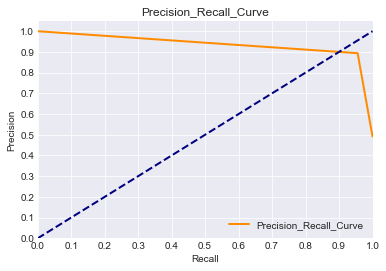

In [51]:
# Evaluation metrics
evaluation_metrics(y_val, y_pred6)

AUC for the ROC curve is: 0.9228208812260538


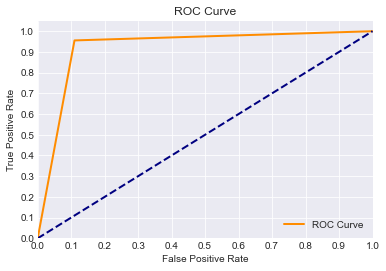

In [52]:
# ROC metrics
roc_metrics(y_val, y_pred6)

We can see that the metrics for the second model and the final knn model have improved. The false positives has dropped and the true negatives have increased. Even the metrics of this model seem to have improved than that of the baseline model.

# Discriminant Analysis.

We will use Quadratic Discriminant Analysis(QDA) since it assumes that each class has its own covariance matrix making it more flexible in capturing the shape of decision boundaries and it assumes the data within each class follows a multivariate normal distribution. It also does not assume independence of features.

First create a QDA baseline model.

In [53]:
# Creating a pipeline for the model
qda1 = Pipeline([
    ('scaler', MinMaxScaler()),
    ('clf', QuadraticDiscriminantAnalysis())
])
# Fitting the model
qda1.fit(X_train_resampled, y_train_resampled)
# Predicting the model
y_pred7 = qda1.predict(X_val)

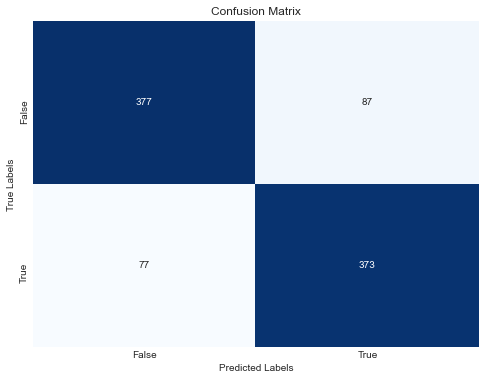

In [54]:
# Confusion metrics
confusion_matrix_metrics(y_val, y_pred7, qda1)

              precision    recall  f1-score   support

       False       0.83      0.81      0.82       464
        True       0.81      0.83      0.82       450

    accuracy                           0.82       914
   macro avg       0.82      0.82      0.82       914
weighted avg       0.82      0.82      0.82       914

---------------------------------------------------
Precision score for this model is: 0.8108695652173913
Recall score for this model is: 0.8288888888888889
Accuracy score for this model is: 0.8205689277899344
F1 score for this model is: 0.8197802197802198
---------------------------------------------------
AUC for the precision-recall curve is: 0.8620017653463568


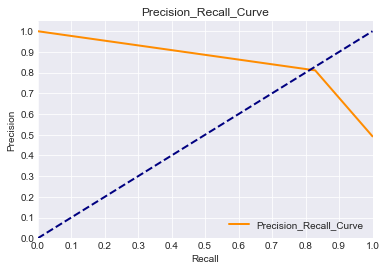

In [55]:
# Evaluation metrics
evaluation_metrics(y_val, y_pred7)

AUC for the ROC curve is: 0.8206944444444445


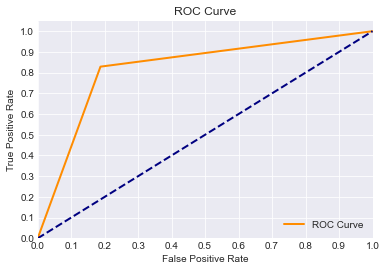

In [56]:
# ROC metrics
roc_metrics(y_val, y_pred7)

Compared to KNN and Decision Tree baseline models, the QDA baseline model has lower metric values. The only issue is that the number of false positives and false negatives are high. We can add the regularization hyperparameter and see if the metrics will improve

In [57]:
# Creating a pipeline for the model
qda2 = Pipeline([
    ('scaler', MinMaxScaler()),
    ('clf', QuadraticDiscriminantAnalysis(reg_param=0.1))
])
# Fitting the model
qda2.fit(X_train_resampled, y_train_resampled)
# Predicting the model
y_pred8 = qda2.predict(X_val)

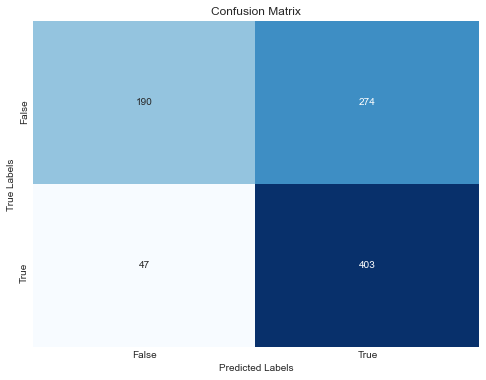

In [58]:
# Confusion metrics
confusion_matrix_metrics(y_val, y_pred8, qda2)

              precision    recall  f1-score   support

       False       0.80      0.41      0.54       464
        True       0.60      0.90      0.72       450

    accuracy                           0.65       914
   macro avg       0.70      0.65      0.63       914
weighted avg       0.70      0.65      0.63       914

---------------------------------------------------
Precision score for this model is: 0.5952732644017725
Recall score for this model is: 0.8955555555555555
Accuracy score for this model is: 0.6487964989059081
F1 score for this model is: 0.7151730257320319
---------------------------------------------------
AUC for the precision-recall curve is: 0.771125569716082


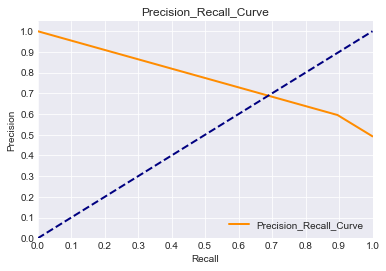

In [59]:
# Evaluation metrics
evaluation_metrics(y_val, y_pred8)

AUC for the ROC curve is: 0.6525191570881226


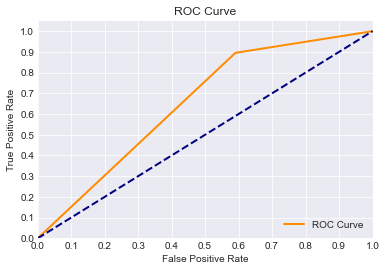

In [60]:
# ROC metrics
roc_metrics(y_val, y_pred8)

We will now use gridresearchCV to find the best regularization hyperparameter for our model

In [61]:
# We will use the baseline QDA model for our GridSearchCV
# Creating the grid parameter
grid3 = {
    'clf__reg_param': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
}
# Creating the grid

gridsearch3 = GridSearchCV(estimator=qda1,
                           param_grid=grid3,
                           scoring='accuracy',
                           cv=5)
# Fitting the data to the grid search
gridsearch3.fit(X_train_resampled, y_train_resampled)

# Getting the best parameters from the grid search
gridsearch3.best_params_

{'clf__reg_param': 0}

In [62]:
# Using the hyperparameters gotten from the gridsearch
qda3 = Pipeline([
    ('scaler', MinMaxScaler()),
    ('clf', QuadraticDiscriminantAnalysis(reg_param=0))
])
# Fitting the model
qda3.fit(X_train_resampled, y_train_resampled)
# Predicting the model
y_pred9 = qda3.predict(X_val)

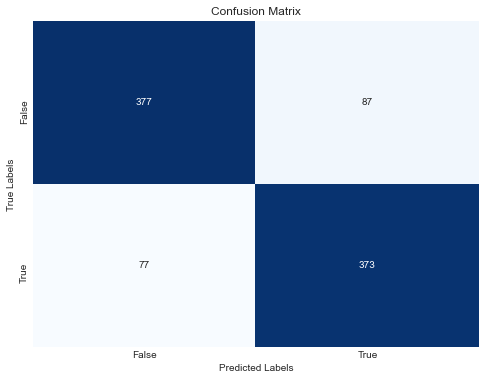

In [63]:
# Confusion metrics
confusion_matrix_metrics(y_val, y_pred9, qda3)

              precision    recall  f1-score   support

       False       0.83      0.81      0.82       464
        True       0.81      0.83      0.82       450

    accuracy                           0.82       914
   macro avg       0.82      0.82      0.82       914
weighted avg       0.82      0.82      0.82       914

---------------------------------------------------
Precision score for this model is: 0.8108695652173913
Recall score for this model is: 0.8288888888888889
Accuracy score for this model is: 0.8205689277899344
F1 score for this model is: 0.8197802197802198
---------------------------------------------------
AUC for the precision-recall curve is: 0.8620017653463568


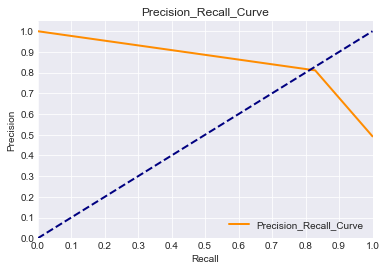

In [64]:
# Evaluation metrics
evaluation_metrics(y_val, y_pred9)

AUC for the ROC curve is: 0.8206944444444445


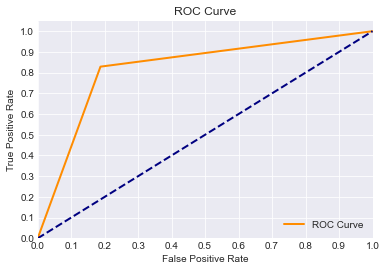

In [65]:
# ROC metrics
roc_metrics(y_val, y_pred9)

From our results, the baseline model is the best so we will use it for model evaluation.

# Random Forests

Since random forests involves constructing a multitude of decision trees, it also doesn't assume independence of features and that's why we re usin it.

In [66]:
# Creating a pipeline for the model
rf1 = Pipeline([
    ('scaler', MinMaxScaler()),
    ('clf', RandomForestClassifier(random_state=42))
])
# Fitting the model
rf1.fit(X_train_resampled, y_train_resampled)
# Predicting the model
y_pred10 = rf1.predict(X_val)

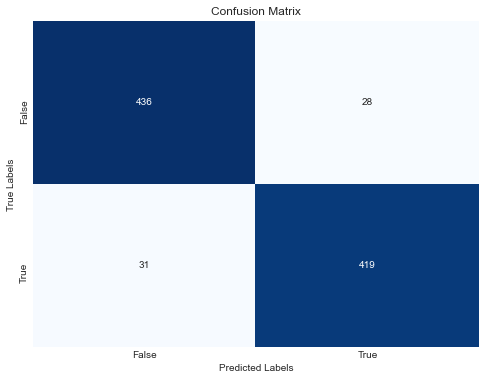

In [67]:
# Confusion metrics
confusion_matrix_metrics(y_val, y_pred10, rf1)

              precision    recall  f1-score   support

       False       0.93      0.94      0.94       464
        True       0.94      0.93      0.93       450

    accuracy                           0.94       914
   macro avg       0.94      0.94      0.94       914
weighted avg       0.94      0.94      0.94       914

---------------------------------------------------
Precision score for this model is: 0.9373601789709173
Recall score for this model is: 0.9311111111111111
Accuracy score for this model is: 0.9354485776805251
F1 score for this model is: 0.9342251950947603
---------------------------------------------------
AUC for the precision-recall curve is: 0.9511940695486728


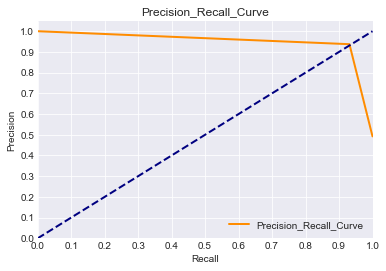

In [68]:
# Evaluation metrics
evaluation_metrics(y_val, y_pred10)

AUC for the ROC curve is: 0.9353831417624521


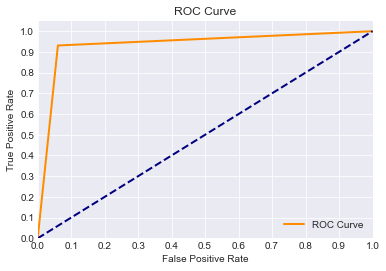

In [69]:
# ROC metrics
roc_metrics(y_val, y_pred10)

We can see that the algorithm has better baseline metrics than the other baseline models. The false negatives and false positives are lower compared to the other baseline models. We can now add some hyperparameters and see if it will improve the model.

In [70]:
rf2 = Pipeline([
    ('scaler', MinMaxScaler()),
    ('clf', RandomForestClassifier(random_state=42, 
                                   criterion='entropy', 
                                   max_depth=5, 
                                   min_samples_split=5, 
                                   min_samples_leaf=2))
])
# Fitting the model
rf2.fit(X_train_resampled, y_train_resampled)
# Predicting the model
y_pred11 = rf2.predict(X_val)

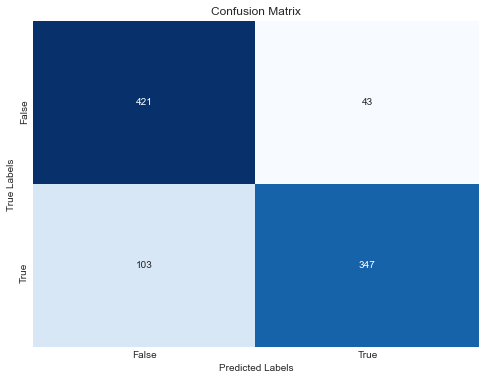

In [71]:
# Confusion metrics
confusion_matrix_metrics(y_val, y_pred11, rf2)

              precision    recall  f1-score   support

       False       0.80      0.91      0.85       464
        True       0.89      0.77      0.83       450

    accuracy                           0.84       914
   macro avg       0.85      0.84      0.84       914
weighted avg       0.85      0.84      0.84       914

---------------------------------------------------
Precision score for this model is: 0.8897435897435897
Recall score for this model is: 0.7711111111111111
Accuracy score for this model is: 0.8402625820568927
F1 score for this model is: 0.8261904761904761
---------------------------------------------------
AUC for the precision-recall curve is: 0.8867730834689259


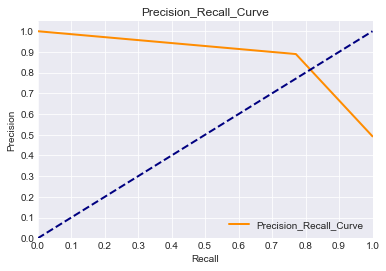

In [72]:
# Evaluation metrics
evaluation_metrics(y_val, y_pred11)

AUC for the ROC curve is: 0.8392193486590038


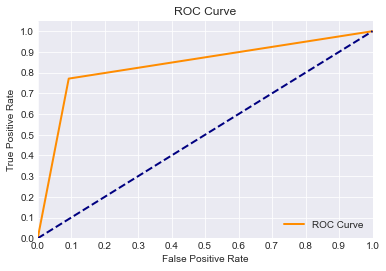

In [79]:
# ROC metrics
roc_metrics(y_val, y_pred11)

We will now use a GridSearchCV to find the best hyperparameters to use for the Random Forest model

In [80]:
# We will use the baseline random forest model for our GridSearchCV
# Creating the grid parameter
grid4 = {
    'clf__criterion': ['entropy', 'gini'],
    'clf__max_depth': [10, 20, 50],
    'clf__min_samples_split': [2, 5, 7, 10],
    'clf__min_samples_leaf': [1, 2, 4, 5], 
}
# Creating the grid

gridsearch4 = GridSearchCV(estimator=rf1,
                           param_grid=grid4,
                           scoring='accuracy',
                           cv=5)
# Fitting the data to the grid search
gridsearch4.fit(X_train_resampled, y_train_resampled)

# Getting the best parameters from the grid search
gridsearch4.best_params_

{'clf__criterion': 'entropy',
 'clf__max_depth': 20,
 'clf__min_samples_leaf': 1,
 'clf__min_samples_split': 2}

In [81]:
# Using the hyperparameters gotten from the gridsearch
rf3 = Pipeline([
    ('scaler', MinMaxScaler()),
    ('clf', RandomForestClassifier(random_state=42, 
                                   criterion='entropy', 
                                   max_depth=20, 
                                   min_samples_leaf=1, 
                                   min_samples_split=2))
])
# Fitting the model
rf3.fit(X_train_resampled, y_train_resampled)
# Predicting the model
y_pred12 = rf3.predict(X_val)

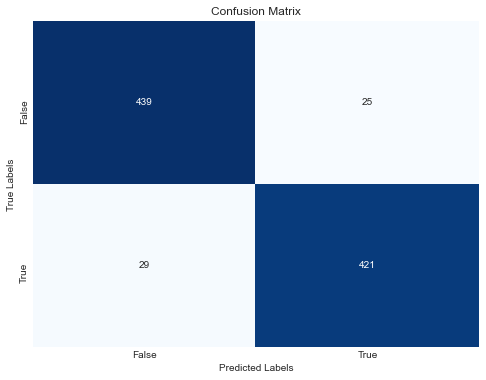

In [82]:
# Confusion metrics
confusion_matrix_metrics(y_val, y_pred12, rf3)

              precision    recall  f1-score   support

       False       0.94      0.95      0.94       464
        True       0.94      0.94      0.94       450

    accuracy                           0.94       914
   macro avg       0.94      0.94      0.94       914
weighted avg       0.94      0.94      0.94       914

---------------------------------------------------
Precision score for this model is: 0.9439461883408071
Recall score for this model is: 0.9355555555555556
Accuracy score for this model is: 0.9409190371991247
F1 score for this model is: 0.9397321428571429
---------------------------------------------------
AUC for the precision-recall curve is: 0.95561520455212


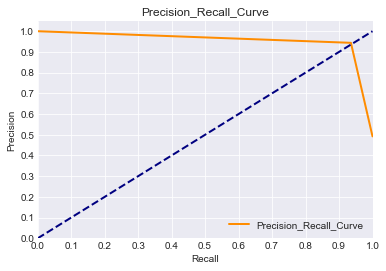

In [77]:
# Evaluation metrics
evaluation_metrics(y_val, y_pred12)

AUC for the ROC curve is: 0.940838122605364


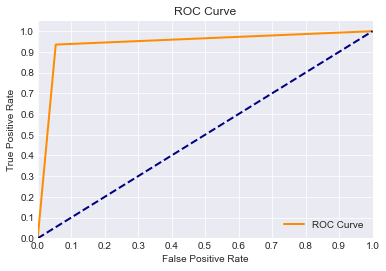

In [83]:
# ROC metrics
roc_metrics(y_val, y_pred12)

From the results we can see that this is the best since even the metrics have improved.We will usethis for our model evaluation

# XGboost

We will use this alorithm since it is pwerful at regression

In [85]:
# Creating a pipeline for the model
xgb1 = Pipeline([
    ('scaler', MinMaxScaler()),
    ('clf', XGBClassifier(random_state=42))
])
# Fitting the model
xgb1.fit(X_train_resampled, y_train_resampled)
# Predicting the model
y_pred13 = xgb1.predict(X_val)

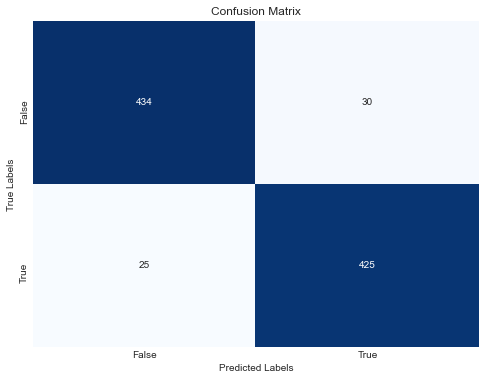

In [86]:
# Confusion metrics
confusion_matrix_metrics(y_val, y_pred13, xgb1)

              precision    recall  f1-score   support

       False       0.95      0.94      0.94       464
        True       0.93      0.94      0.94       450

    accuracy                           0.94       914
   macro avg       0.94      0.94      0.94       914
weighted avg       0.94      0.94      0.94       914

---------------------------------------------------
Precision score for this model is: 0.9340659340659341
Recall score for this model is: 0.9444444444444444
Accuracy score for this model is: 0.9398249452954048
F1 score for this model is: 0.9392265193370165
---------------------------------------------------
AUC for the precision-recall curve is: 0.9529313380516882


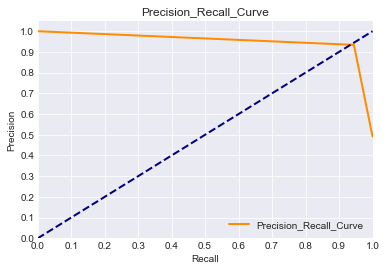

In [87]:
# Evaluation metrics
evaluation_metrics(y_val, y_pred13)

AUC for the ROC curve is: 0.9398946360153256


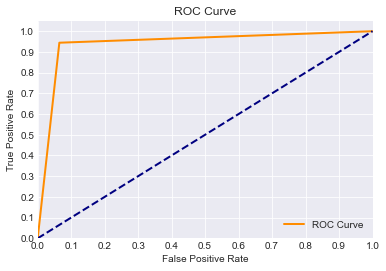

In [88]:
# ROC metrics
roc_metrics(y_val, y_pred13)

We can add some hyperparameters to improve the model

In [89]:
# Creating a pipeline for the model
xgb2 = Pipeline([
    ('scaler', MinMaxScaler()),
    ('clf', XGBClassifier(random_state=42, learning_rate=0.2, n_estimators=50, max_depth=5))
])
# Fitting the model
xgb2.fit(X_train_resampled, y_train_resampled)
# Predicting the model
y_pred14 = xgb2.predict(X_val)

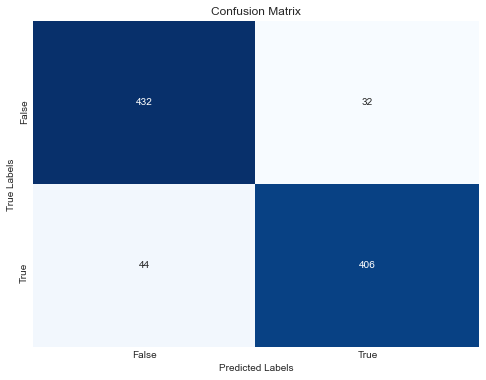

In [90]:
# Confusion metrics
confusion_matrix_metrics(y_val, y_pred14, xgb2)

              precision    recall  f1-score   support

       False       0.91      0.93      0.92       464
        True       0.93      0.90      0.91       450

    accuracy                           0.92       914
   macro avg       0.92      0.92      0.92       914
weighted avg       0.92      0.92      0.92       914

---------------------------------------------------
Precision score for this model is: 0.9269406392694064
Recall score for this model is: 0.9022222222222223
Accuracy score for this model is: 0.9168490153172867
F1 score for this model is: 0.9144144144144144
---------------------------------------------------
AUC for the precision-recall curve is: 0.9386514526276524


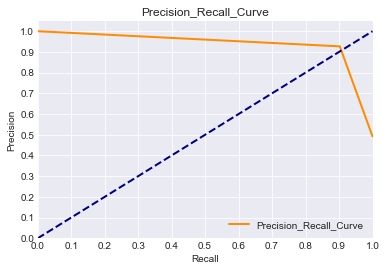

In [91]:
# Evaluation metrics
evaluation_metrics(y_val, y_pred14)

AUC for the ROC curve is: 0.9166283524904214


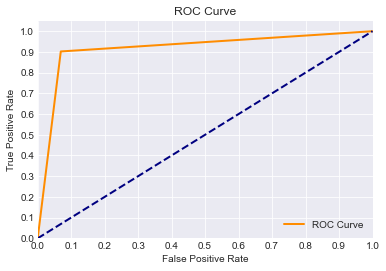

In [92]:
# ROC metrics
roc_metrics(y_val, y_pred14)

 We can perform a GridSearchCV to find the hyperparameters that may bring the best model metrics

In [93]:
# We will use the baseline XGBoost model for our GridSearchCV
# Creating the grid parameter
grid5 = {
    'clf__learning_rate': [0.01, 0.1, 0.2, 0.4, 0.5],
    'clf__n_estimators': [10, 20, 30, 50, 100],
    'clf__max_depth': [3, 4, 5, 7, 10],
    'clf__subsample': [0.8, 0.9, 1, 1.5, 2], 
}

# Creating the grid

gridsearch5 = GridSearchCV(estimator=xgb1,
                           param_grid=grid5,
                           scoring='accuracy',
                           cv=5)
# Fitting the data to the grid search
gridsearch5.fit(X_train_resampled, y_train_resampled)

# Getting the best parameters from the grid search
gridsearch5.best_params_

{'clf__learning_rate': 0.2,
 'clf__max_depth': 10,
 'clf__n_estimators': 100,
 'clf__subsample': 0.8}

In [94]:
xgb3 = Pipeline([
    ('scaler', MinMaxScaler()),
    ('clf', XGBClassifier(random_state=42, learning_rate=0.2, n_estimators=100, max_depth=10, subsample=0.8))
])
# Fitting the model
xgb3.fit(X_train_resampled, y_train_resampled)
# Predicting the model
y_pred15 = xgb3.predict(X_val)

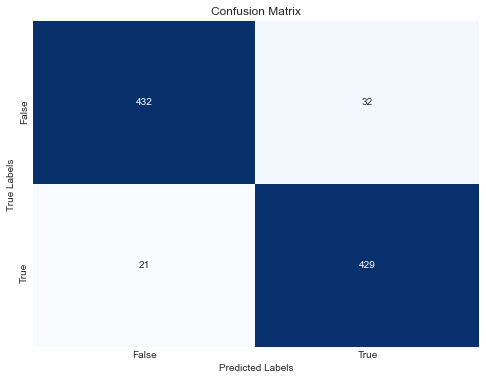

In [95]:
# Confusion metrics
confusion_matrix_metrics(y_val, y_pred15, xgb3)

              precision    recall  f1-score   support

       False       0.95      0.93      0.94       464
        True       0.93      0.95      0.94       450

    accuracy                           0.94       914
   macro avg       0.94      0.94      0.94       914
weighted avg       0.94      0.94      0.94       914

---------------------------------------------------
Precision score for this model is: 0.93058568329718
Recall score for this model is: 0.9533333333333334
Accuracy score for this model is: 0.9420131291028446
F1 score for this model is: 0.9418221734357848
---------------------------------------------------
AUC for the precision-recall curve is: 0.9534474733043158


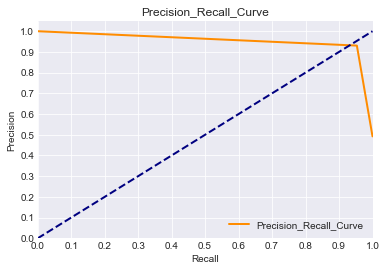

In [96]:
# Evaluation metrics
evaluation_metrics(y_val, y_pred15)

AUC for the ROC curve is: 0.9421839080459771


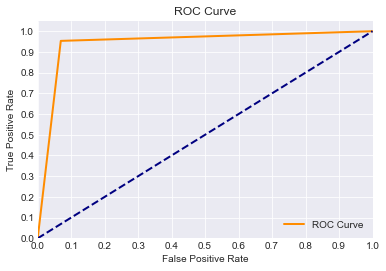

In [97]:
# ROC metrics
roc_metrics(y_val, y_pred15)

We can see that the final model performs better than the other two models since it has better metrics and lower false values, we'll use this for the model evaluation

#  Model Evaluation

We said we would be using the recall score as the determing metric. We will therefore evaluate our models using the test datasets and choose the best model for predicting customer churn.

In [98]:
# Getting recall scores for each model.
print('--------------------------RECALL SCORES------------------------------\n')
print(f'Recall score for Decision Tree: {round(recall_score(y_test, dt3.predict(X_test)), 3)}\n')
print(f'Recall score for K-Nearest Neighbors: {round(recall_score(y_test, knn3.predict(X_test)), 3)}\n')
print(f'Recall score for Quadratic Discriminant Analysis: {round(recall_score(y_test, qda3.predict(X_test)), 3)}\n')
print(f'Recall score for Random Forests: {round(recall_score(y_test, rf3.predict(X_test)), 3)}\n')
print(f'Recall score for XGBoost: {round(recall_score(y_test, xgb3.predict(X_test)), 3)}')

--------------------------RECALL SCORES------------------------------

Recall score for Decision Tree: 0.772

Recall score for K-Nearest Neighbors: 0.604

Recall score for Quadratic Discriminant Analysis: 0.723

Recall score for Random Forests: 0.772

Recall score for XGBoost: 0.812


We can see that the XGBoost algorithm gives more than 80% recall score which is a good sign and one that can be presented to the SyriaTel stakeholders. This is why this model will be chosen to predict customer churn.

# Limitations

The classes were imbalanced. in that the `False` class was way more than the `True` class. This is why we had to use the SMOTE technique to mitigate the issue.

# Model Deployment

We first store the model in a file

In [99]:
# Storing the model
model = XGBClassifier(random_state=42, learning_rate=0.2, n_estimators=100, max_depth=10, subsample=0.8)
with open('customer_churn_model.pkl', 'wb') as f:
    joblib.dump(model, f)